<div class="alert alert-block alert-info" style="text-align:center;font-size:20px" > <b>Diamond Price Predict</b></div>

<div class="alert alert-block alert-warning" style="text-align:center;font-size:14px" > <b>By Hamid Jamali</b></div>

**Table of contents**<a id='toc0_'></a>    
- [Installing Required Libraries](#toc1_)    
- [Importing Libraries](#toc2_)    
- [Importing Dataset](#toc3_)    
- [EDA](#toc4_)    
  - [Data Profiling](#toc4_1_)    
  - [Drop Unnecessary Columns : Unnamed: 0](#toc4_2_)    
  - [Check for Null Values](#toc4_3_)    
  - [Data Analysis](#toc4_4_)    
- [Preprocessing the Data](#toc5_)    
  - [Check for Duplicate Values](#toc5_1_)    
  - [Encoding Categorical Data](#toc5_2_)    
- [Splitting the Dataset into Training Set and Test Set](#toc6_)    
  - [Train Test Split](#toc6_1_)    
- [Feature Scaling](#toc7_)    
- [Machine Learning Models](#toc8_)    
  - [Linear Regression](#toc8_1_)    
  - [Decision Tree Regression](#toc8_2_)    
  - [Random Forest Regression](#toc8_3_)    
  - [XGBRegressor](#toc8_4_)    
  - [Gradient-Boosting-Regressor Model](#toc8_5_)    
  - [Ada-Boost-Regressor Model](#toc8_6_)    
  - [LGMB Regressor Model](#toc8_7_)    
  - [Cat-Boost-Regressor Model](#toc8_8_)    
- [All Models Comparison](#toc9_)    
- [Conclusion](#toc10_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Installing Required Libraries](#toc0_)

In [111]:
#%pip install numpy
#%pip install pandas
#%pip install matplotlib
#%pip install ipympl
#%pip install seaborn
#%pip install scikit-learn
#%pip install ydata-profiling
#%pip install xgboost
#%pip install catboost
#%pip install lightgbm

# <a id='toc2_'></a>[Importing Libraries](#toc0_)

## <a id='toc8_8_'></a>[Cat-Boost-Regressor Model](#toc0_)

In [96]:
import numpy as np # linear algebra
import pandas as pd # data processing

#Data visualization libraries
import matplotlib.pyplot as plt # data visualization with matplotlib
import seaborn as sns # data visualization with seaborn
# Interactive plots
%matplotlib inline 

#Data Profiling
from ydata_profiling import ProfileReport

#Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.model_selection import train_test_split # data split
from sklearn.linear_model import LinearRegression  # Linear Regression 
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor # Random Forest Regression , Gradient Boosting Regression, AdaBoost Regression
from xgboost import XGBRegressor # XGBoost Regression
from catboost import CatBoostRegressor # CatBoost Regression
from lightgbm import LGBMRegressor # LightGBM Regression
from sklearn.metrics import mean_squared_error, r2_score # model evaluation


# <a id='toc3_'></a>[Importing Dataset](#toc0_)

In [54]:
df=pd.read_csv('diamonds.csv')

Data Overview

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [56]:
df.describe()

Unnamed: 0         carat         depth         table         price   
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  \
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

# <a id='toc4_'></a>[EDA](#toc0_)

## <a id='toc4_1_'></a>[Data Profiling](#toc0_)

Overview of the data embedded in this notebook

In [57]:
dataset_profile=ProfileReport(df, title="Diamond Data Profile")
dataset_profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data Profiling Export to HTML

In [58]:
dataset_profile.to_file("Diamond  Data Profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## <a id='toc4_2_'></a>[Drop Unnecessary Columns : Unnamed: 0](#toc0_)

In [59]:
df.drop('Unnamed: 0',axis='columns',inplace=True)
df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

## <a id='toc4_3_'></a>[Check for Null Values](#toc0_)

In [60]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There is no null values in the dataset

## <a id='toc4_4_'></a>[Data Analysis](#toc0_)

Price Distribution

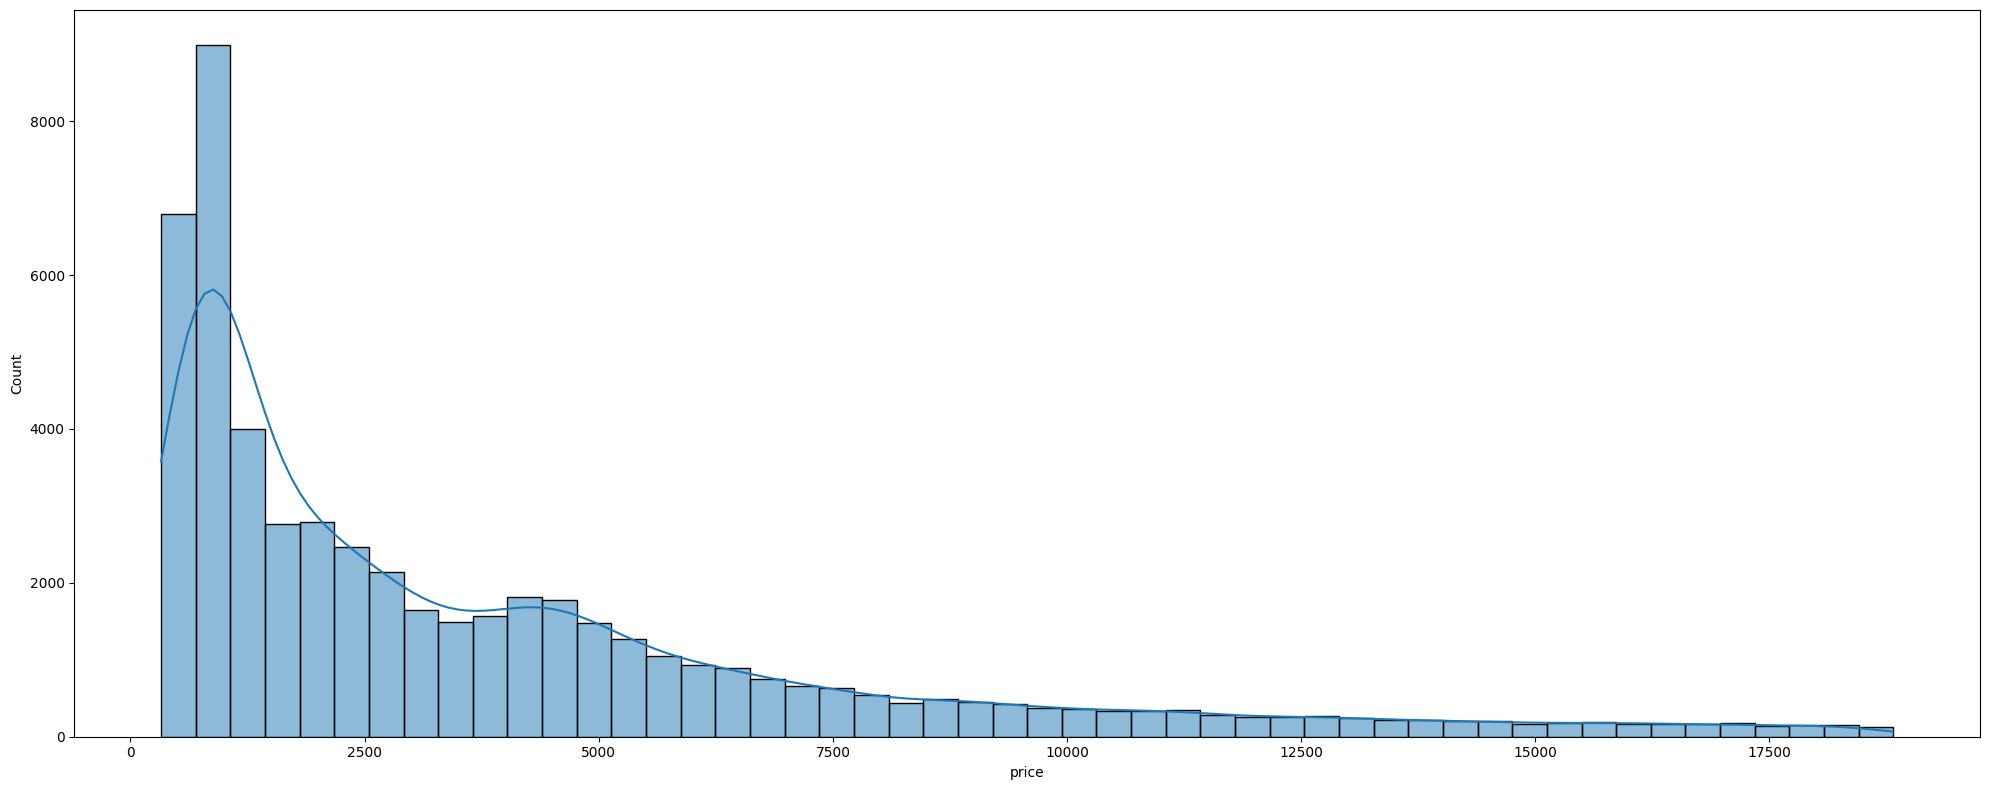

In [61]:
plt.figure(figsize=(20,8))
sns.histplot(x=df['price'],bins=50,kde=True)
plt.tight_layout()
plt.show()

Relation between Price and Carat, Cut, Color, Clarity, Depth, Table, X, Y, Z

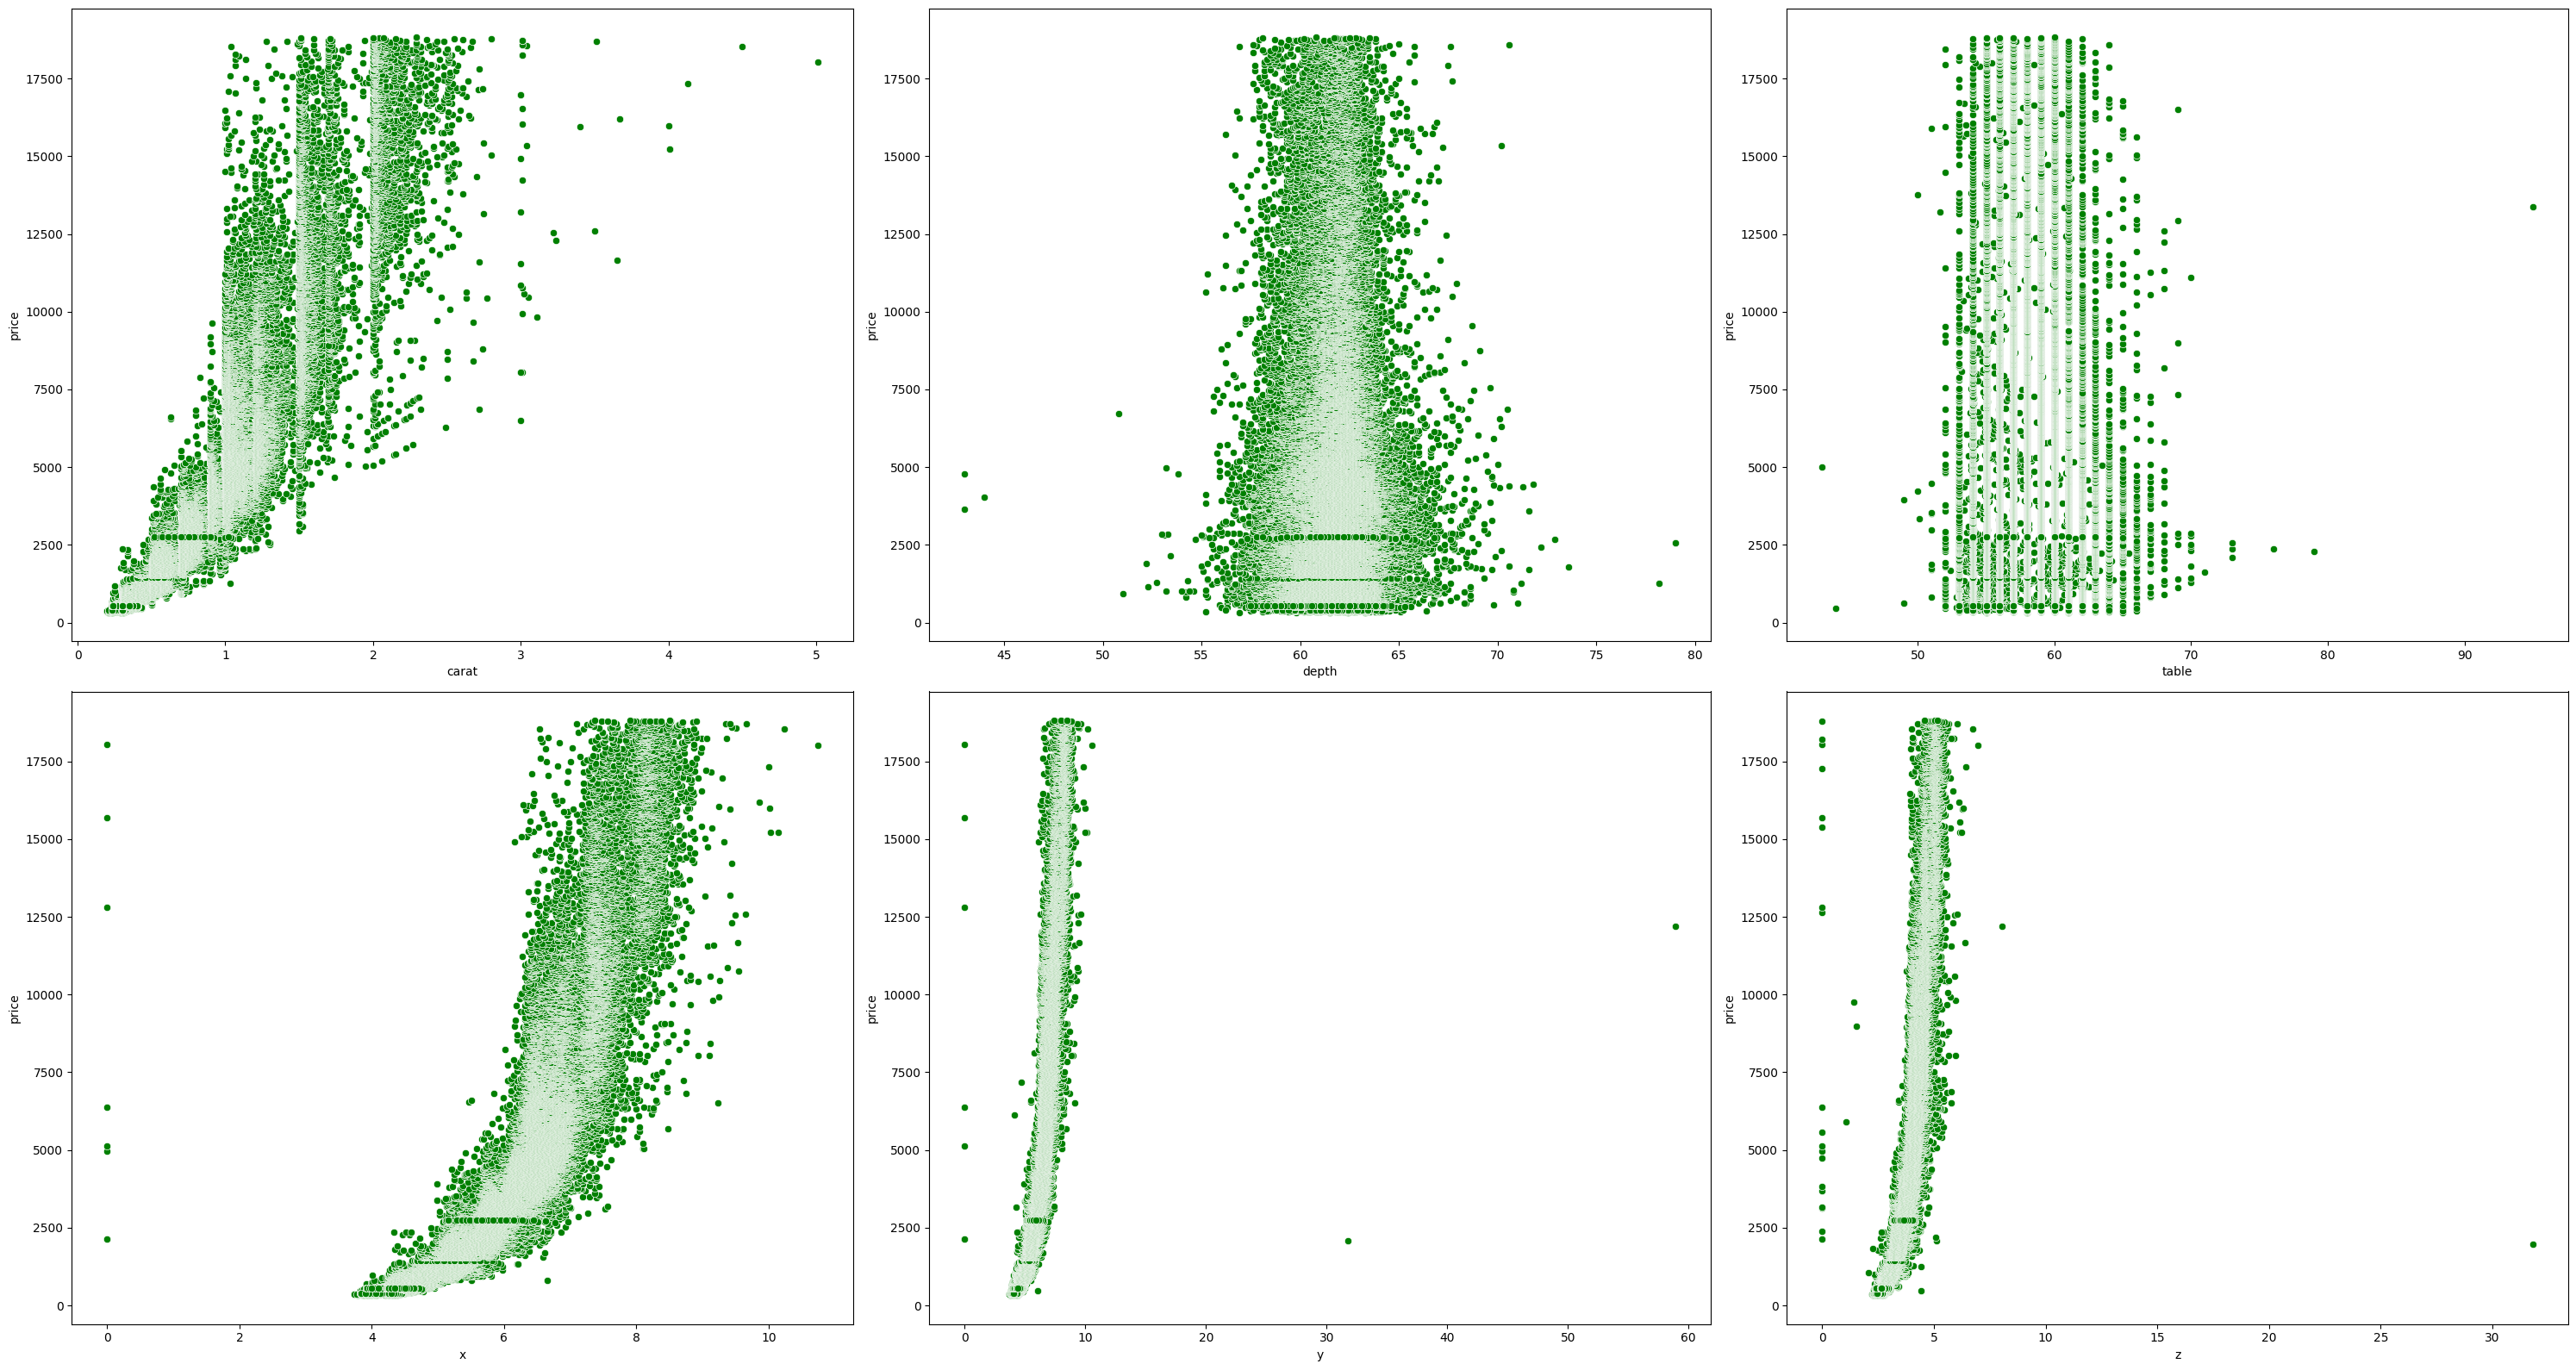

In [62]:
fig,ax=plt.subplots(2,3,figsize=(30,16))
i=0;j=0
for col in (df.select_dtypes(include='float64')):
    sns.scatterplot(x=col,y='price',data=df,color='green',ax=ax[i,j])
    j+=1
    if(j==3):
        j=0
        i+=1
plt.tight_layout()
plt.show()

Relation between Price and Cut , Color , Clarity (Categorical) 

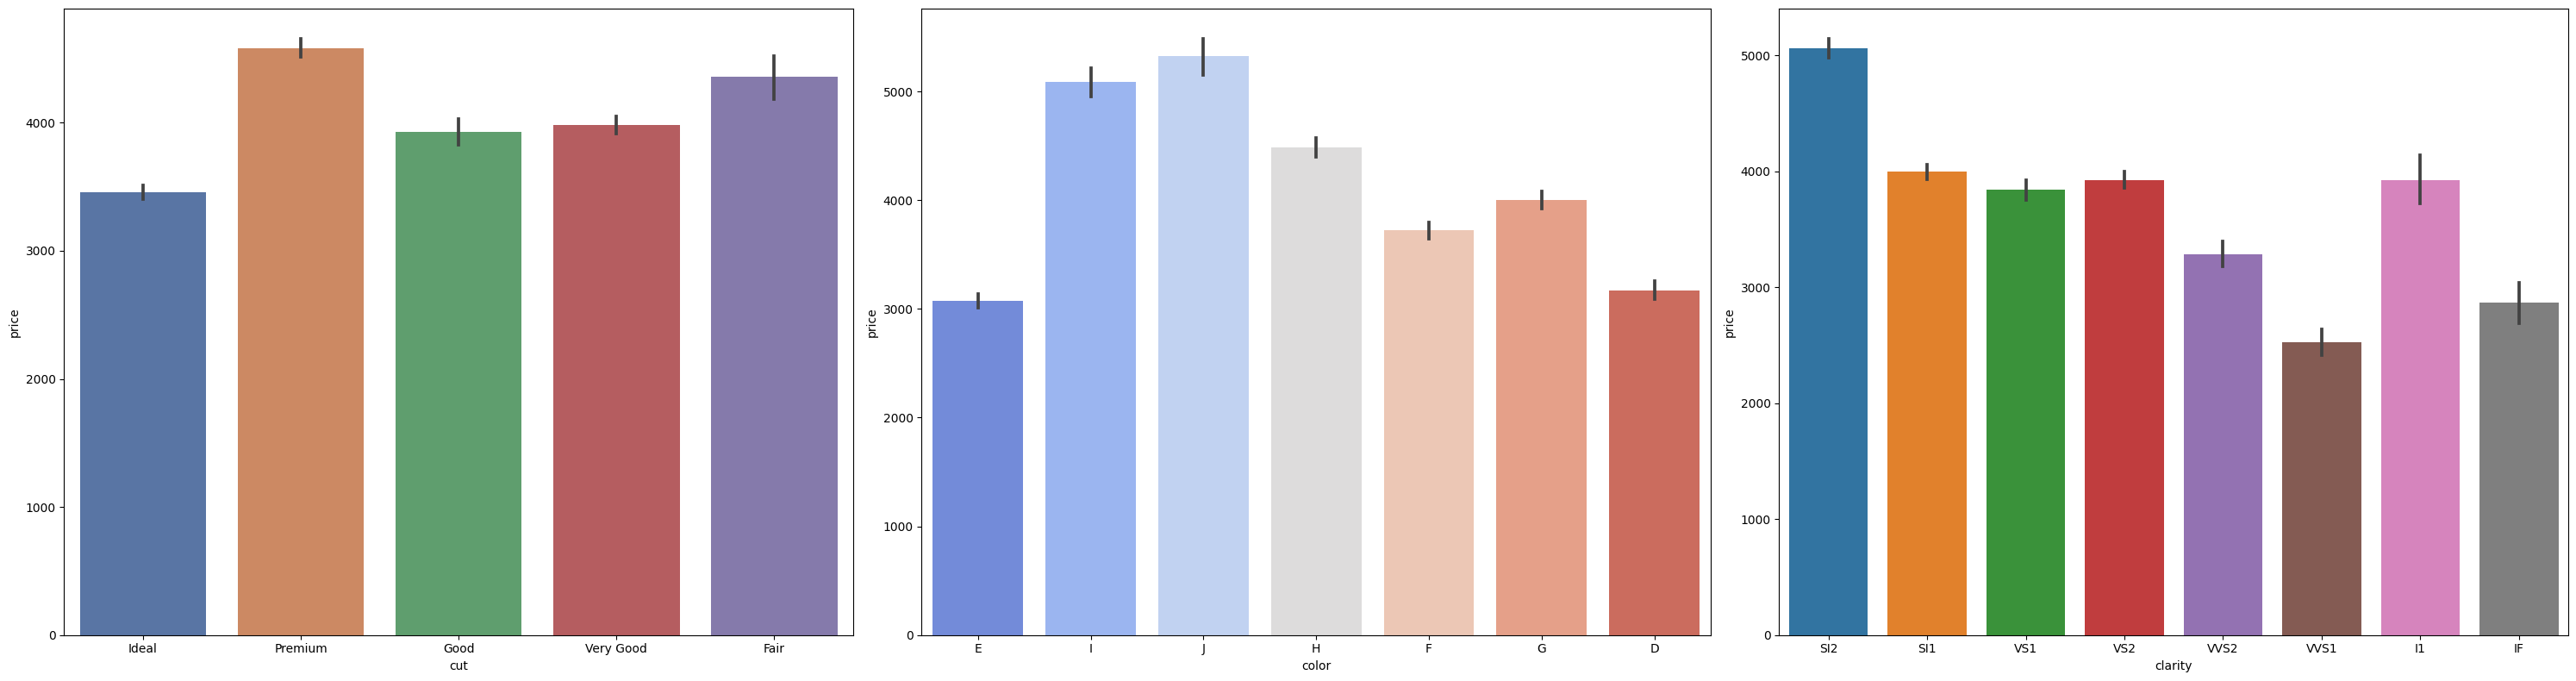

In [63]:
fig,ax=plt.subplots(1,3,figsize=(30,8))
palette=['deep','coolwarm',None]
for i,col in enumerate(df.select_dtypes(include='object').columns):
    sns.barplot(x=col,y='price',data=df,ax=ax[i],palette=palette[i])
plt.tight_layout()
plt.show()

Count of Cut, Color, Clarity (Categorical)

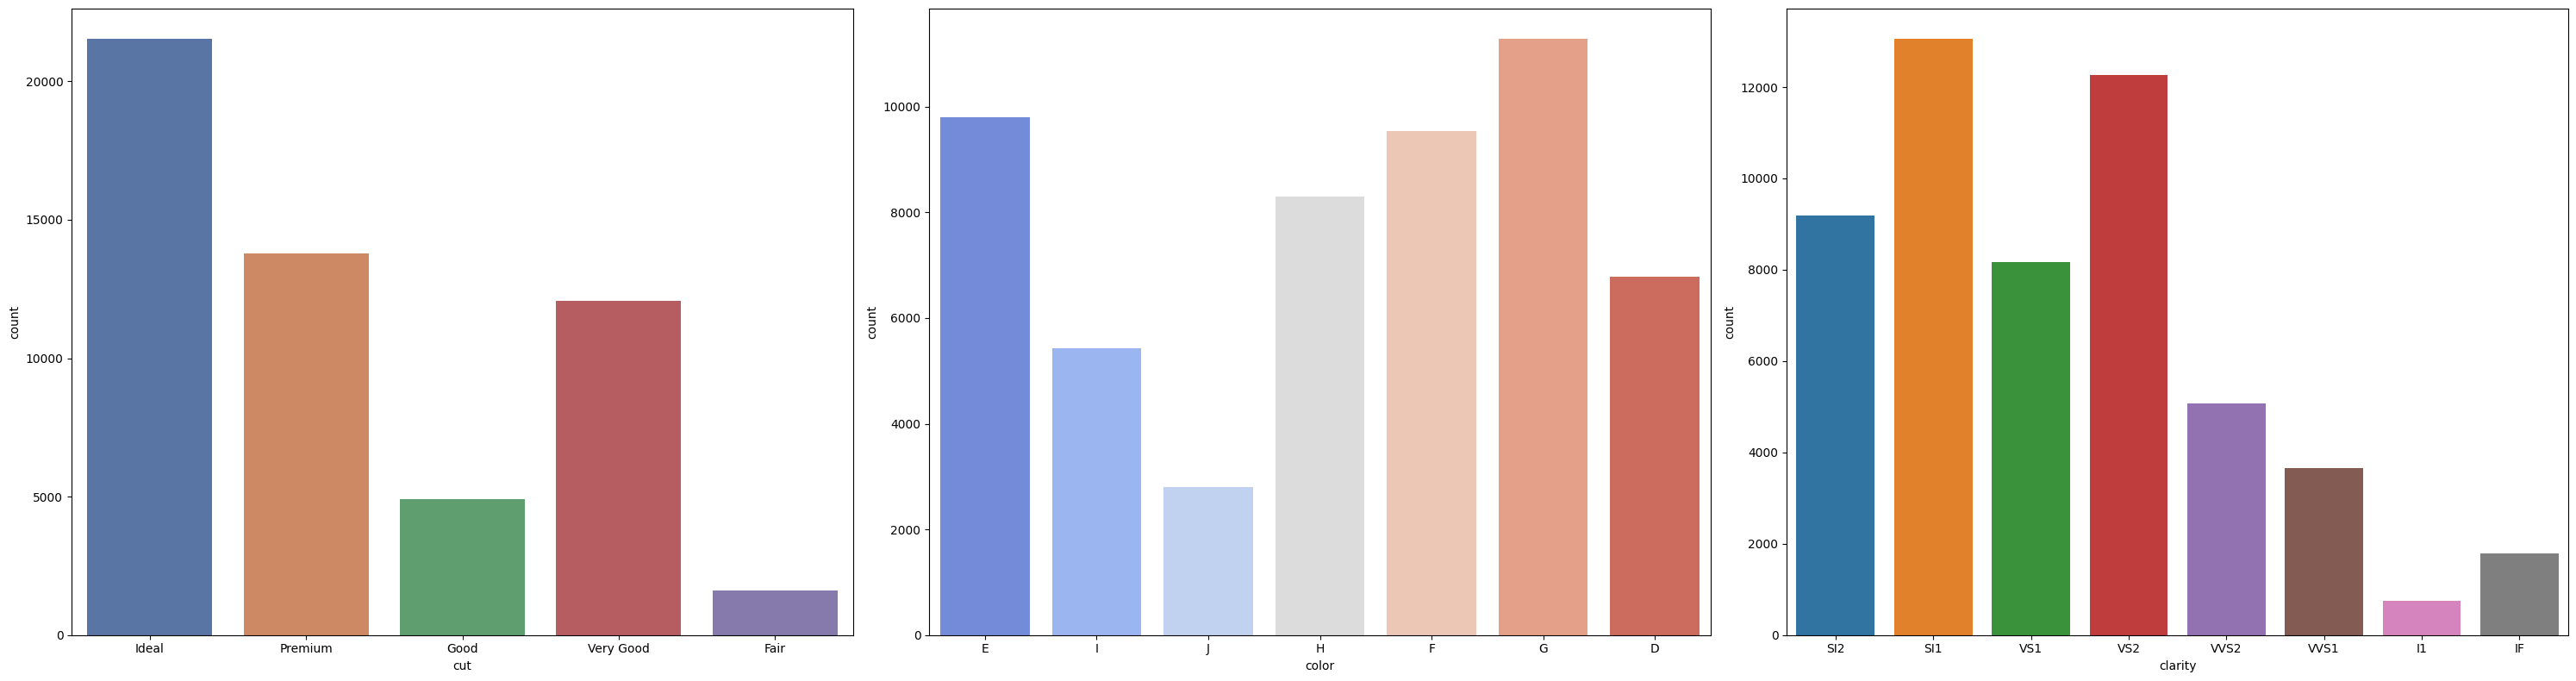

In [64]:
fig,ax=plt.subplots(1,3,figsize=(30,8))
palette=['deep','coolwarm',None]
for i,col in enumerate(df.select_dtypes(include='object').columns):
    sns.countplot(x=col,data=df,ax=ax[i],palette=palette[i])
plt.tight_layout()
plt.show()


No such diamond can exist whose length or width or depth is zero, so entries with any of these are abnormal and thus dropping them. Also, elements with width(y)>30 and depth(z)>30 seems to be outliers, so removing them too.


In [65]:
#Make a copy of the original dataset
data_new = df.copy()
data_new

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

Drop the rows with x=0, y=0, z=0 and y>30, z>30

In [66]:
data_new.drop(data_new.loc[(data_new['x']==0)|(data_new['y']==0)|(data_new['z']==0)|(data_new['y']>30)|(data_new['z']>30)].index,inplace=True)
data_new

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53917 rows x 10 columns]

Now we visualize the data after removing the outliers of x, y, z

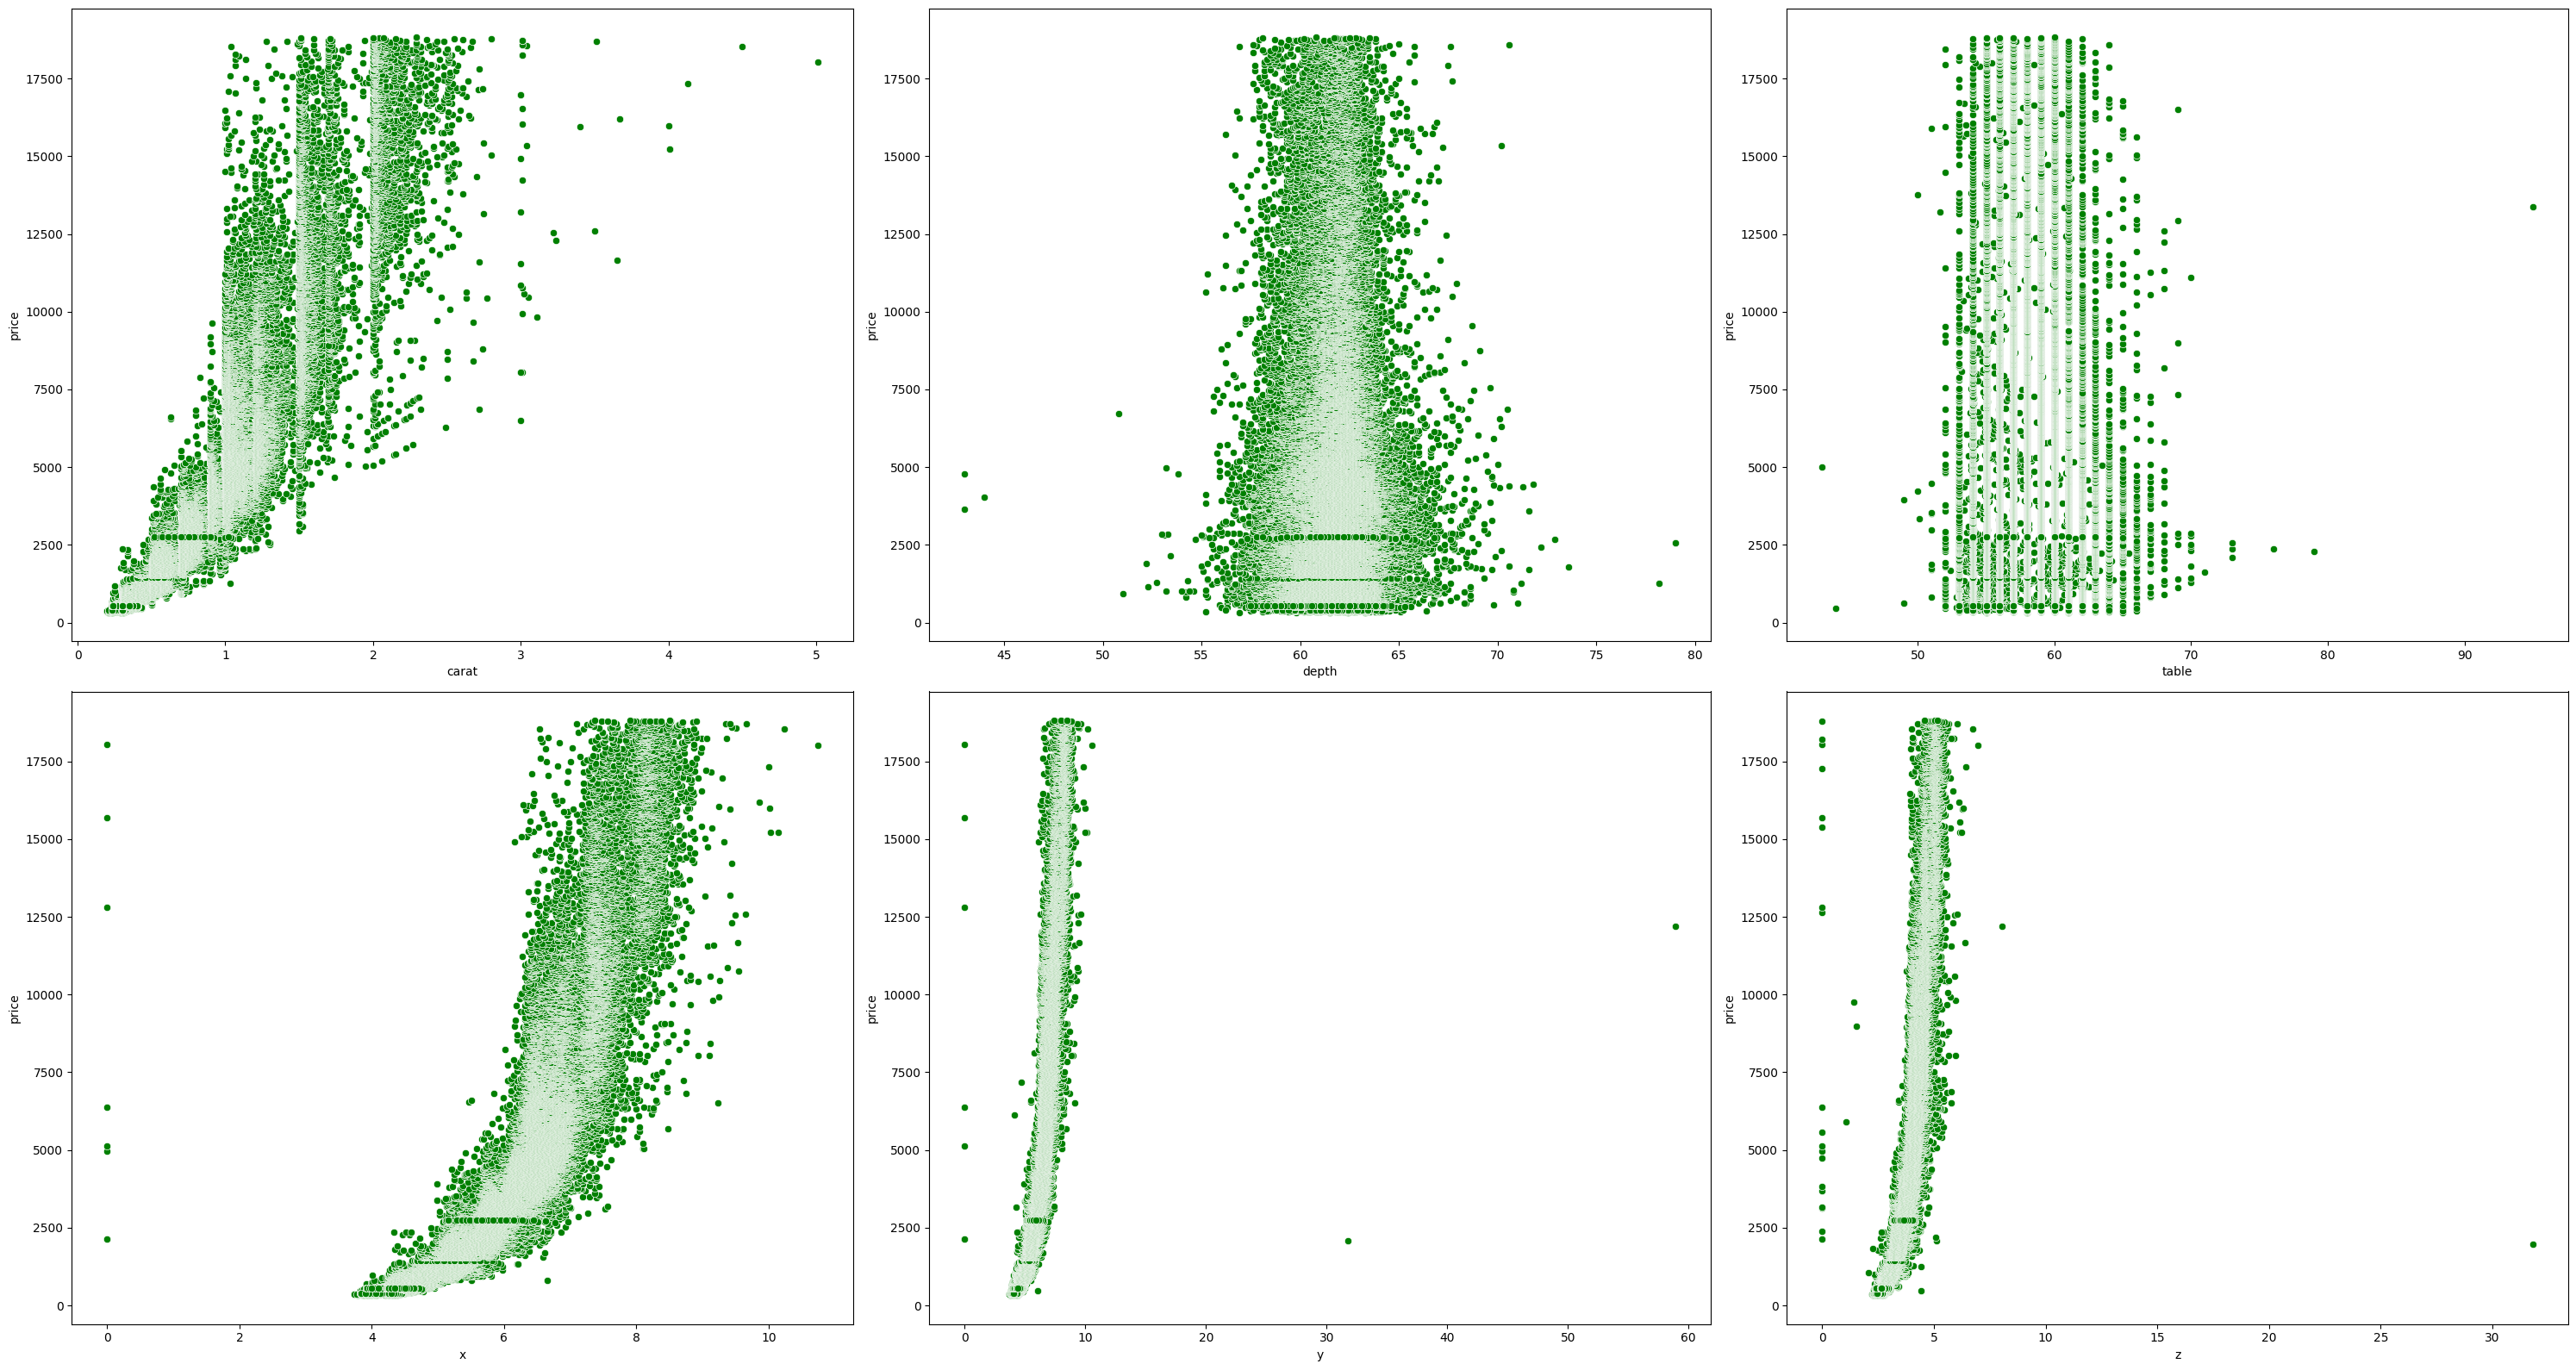

In [67]:
fig,ax=plt.subplots(2,3,figsize=(30,16))
i=0;j=0
for col in (df.select_dtypes(include='float64')):
    sns.scatterplot(x=col,y='price',data=df,color='green',ax=ax[i,j])
    j+=1
    if(j==3):
        j=0
        i+=1
plt.tight_layout()
plt.show()

Now we can see that as the carat increases, the price also increases. So, we can say that carat is directly proportional to price.

As we can see the elements with table>80 are outliers, so removing them.

In [68]:
data_new.drop(data_new.loc[data_new['table']>80].index,inplace=True)
data_new

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53916 rows x 10 columns]

# <a id='toc5_'></a>[Preprocessing the Data](#toc0_)

## <a id='toc5_1_'></a>[Check for Duplicate Values](#toc0_)

In [69]:
data_new[data_new.duplicated()]
data_new.drop_duplicates(inplace=True)
data_new

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53771 rows x 10 columns]

As you can see there are 145 duplicates in the dataset. So, we will remove them.

## <a id='toc5_2_'></a>[Encoding Categorical Data](#toc0_)

I have to encode the categorical data to numerical data so that the machine learning model can understand it.
In this dataset we have to encode the Cut, Color and Clarity columns.

I wanna use pd.get_dummies() method to encode the categorical data.

In [70]:
#Keep Original Data for further actions
data_Categorical=data_new.copy()

In [71]:
data_new_ready=pd.get_dummies(data_new,columns=['cut','color','clarity'],drop_first=True)
data_new_ready

carat  depth  table  price     x     y     z  cut_Good  cut_Ideal   
0       0.23   61.5   55.0    326  3.95  3.98  2.43     False       True  \
1       0.21   59.8   61.0    326  3.89  3.84  2.31     False      False   
2       0.23   56.9   65.0    327  4.05  4.07  2.31      True      False   
3       0.29   62.4   58.0    334  4.20  4.23  2.63     False      False   
4       0.31   63.3   58.0    335  4.34  4.35  2.75      True      False   
...      ...    ...    ...    ...   ...   ...   ...       ...        ...   
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50     False       True   
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61      True      False   
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56     False      False   
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74     False      False   
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64     False       True   

       cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1   
0            False  ...    False    False    False       False        False  \
1             True  ...    False    False    False       False         True   
2            False  ...    False    False    False       False        False   
3             True  ...    False     True    False       False        False   
4            False  ...    False    False     True       False        False   
...            ...  ...      ...      ...      ...         ...          ...   
53935        False  ...    False    False    False       False         True   
53936        False  ...    False    False    False       False         True   
53937        False  ...    False    False    False       False         True   
53938         True  ...     True    False    False       False        False   
53939        False  ...    False    False    False       False        False   

       clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0             True        False        False         False         False  
1            False        False        False         False         False  
2            False         True        False         False         False  
3            False        False         True         False         False  
4             True        False        False         False         False  
...            ...          ...          ...           ...           ...  
53935        False        False        False         False         False  
53936        False        False        False         False         False  
53937        False        False        False         False         False  
53938         True        False        False         False         False  
53939         True        False        False         False         False  

[53771 rows x 24 columns]

# <a id='toc6_'></a>[Splitting the Dataset into Training Set and Test Set](#toc0_)

I set target variable as Price and rest of the variables as features.

In [72]:
target='price'
X=data_new_ready.drop([target],axis=1)
y=data_new_ready[[target]]

Cheking the content of x , y

In [73]:
X.head(1)

carat  depth  table     x     y     z  cut_Good  cut_Ideal  cut_Premium   
0   0.23   61.5   55.0  3.95  3.98  2.43     False       True        False  \

   cut_Very Good  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1   
0          False  ...    False    False    False       False        False  \

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0         True        False        False         False         False  

[1 rows x 23 columns]

In [74]:
y.head(1)

price
0    326

## <a id='toc6_1_'></a>[Train Test Split](#toc0_)

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,)

# <a id='toc7_'></a>[Feature Scaling](#toc0_)

We have to scale the features so that the machine learning model can understand it.

In [76]:
SC_X = StandardScaler()
X_train = SC_X.fit_transform(X_train)
X_test = SC_X.transform(X_test)


# <a id='toc8_'></a>[Machine Learning Models](#toc0_)

First define a function for Model Evaluation

In [97]:
training_score = []
testing_score = []
rmse=[]

In [98]:
def model_prediction(model):
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    a = r2_score(y_train,y_train_pred)*100
    b = r2_score(y_test,y_test_pred)*100
    c = mean_squared_error(y_test, y_test_pred)
    training_score.append(a)
    testing_score.append(b)
    rmse.append(c)


    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    print(f"RMSE of {model} model on Testing Data is:",c)
    

## <a id='toc8_1_'></a>[Linear Regression](#toc0_)

In [99]:
model_prediction(LinearRegression())


r2_Score of LinearRegression() model on Training Data is: 92.07583219164991
r2_Score of LinearRegression() model on Testing Data is: 92.03937718170027
RMSE of LinearRegression() model on Testing Data is: 1274353.118233932


## <a id='toc8_2_'></a>[Decision Tree Regression](#toc0_)

In [100]:
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.99952259055452
r2_Score of DecisionTreeRegressor() model on Testing Data is: 95.23009428750898
RMSE of DecisionTreeRegressor() model on Testing Data is: 763576.4634422266


## <a id='toc8_3_'></a>[Random Forest Regression](#toc0_)

In [101]:
model_prediction(RandomForestRegressor())

C:\Users\H_jam\AppData\Local\Temp\ipykernel_23608\3714319960.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


r2_Score of RandomForestRegressor() model on Training Data is: 99.63847739858636
r2_Score of RandomForestRegressor() model on Testing Data is: 97.5386295108598
RMSE of RandomForestRegressor() model on Testing Data is: 394021.32591363275


## <a id='toc8_4_'></a>[XGBRegressor](#toc0_)

In [102]:
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 98.87461547097931
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

## <a id='toc8_5_'></a>[Gradient-Boosting-Regressor Model](#toc0_)

In [103]:
model_prediction(GradientBoostingRegressor())

C:\Users\H_jam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2_Score of GradientBoostingRegressor() model on Training Data is: 95.59494294878603
r2_Score of GradientBoostingRegressor() model on Testing Data is: 95.48813199989891
RMSE of GradientBoostingRegressor() model on Testing Data is: 722269.24779948


## <a id='toc8_6_'></a>[Ada-Boost-Regressor Model](#toc0_)

In [104]:
model_prediction(AdaBoostRegressor())

C:\Users\H_jam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2_Score of AdaBoostRegressor() model on Training Data is: 84.71982904883835
r2_Score of AdaBoostRegressor() model on Testing Data is: 84.75300146874486
RMSE of AdaBoostRegressor() model on Testing Data is: 2440771.3523805896


## <a id='toc8_7_'></a>[LGMB Regressor Model](#toc0_)

In [105]:
model_prediction(LGBMRegressor())

C:\Users\H_jam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2_Score of LGBMRegressor() model on Training Data is: 98.4420259809849
r2_Score of LGBMRegressor() model on Testing Data is: 98.01748105132847
RMSE of LGBMRegressor() model on Testing Data is: 317365.7717320454


## <a id='toc8_8_'></a>[Cat-Boost-Regressor Model](#toc0_)

In [106]:
model_prediction(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x00000283D38FA6B0> model on Training Data is: 98.59392599994953
r2_Score of <catboost.core.CatBoostRegressor object at 0x00000283D38FA6B0> model on Testing Data is: 97.9999884842957
RMSE of <catboost.core.CatBoostRegressor object at 0x00000283D38FA6B0> model on Testing Data is: 320166.01837768307


# <a id='toc9_'></a>[All Models Comparison](#toc0_)

create a dataframe for all models comparison 

In [107]:
models = ["Linear Regression","Decision Tree Regression","Random Forest Regression","XGBoost" ,"Gradient Boosting Regression","AdaBoost Regression","LGBM Regression","CatBoost Regression"]

In [108]:
compare_models = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,"RMSE":rmse})
compare_models

Algorithms  Training Score  Testing Score          RMSE
0             Linear Regression       92.075832      92.039377  1.274353e+06
1      Decision Tree Regression       99.999523      95.230094  7.635765e+05
2      Random Forest Regression       99.638477      97.538630  3.940213e+05
3                       XGBoost       98.874615      97.833873  3.467581e+05
4  Gradient Boosting Regression       95.594943      95.488132  7.222692e+05
5           AdaBoost Regression       84.719829      84.753001  2.440771e+06
6               LGBM Regression       98.442026      98.017481  3.173658e+05
7           CatBoost Regression       98.593926      97.999988  3.201660e+05

Plotting the graph of all the models using their R2 Score with bar plot

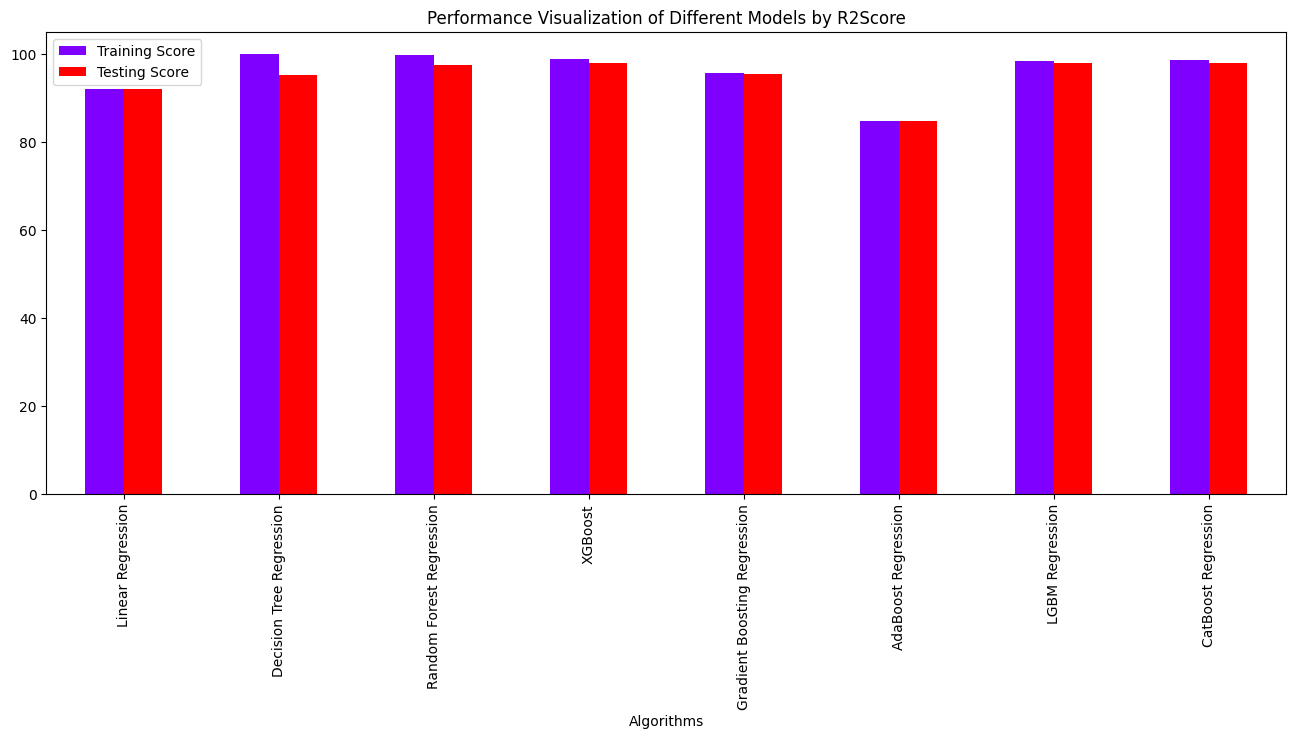

In [109]:
compare_models.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",title="Performance Visualization of Different Models by R2Score",colormap="rainbow")
plt.show()

Plotting the graph of all the models using their RMSE with bar plot

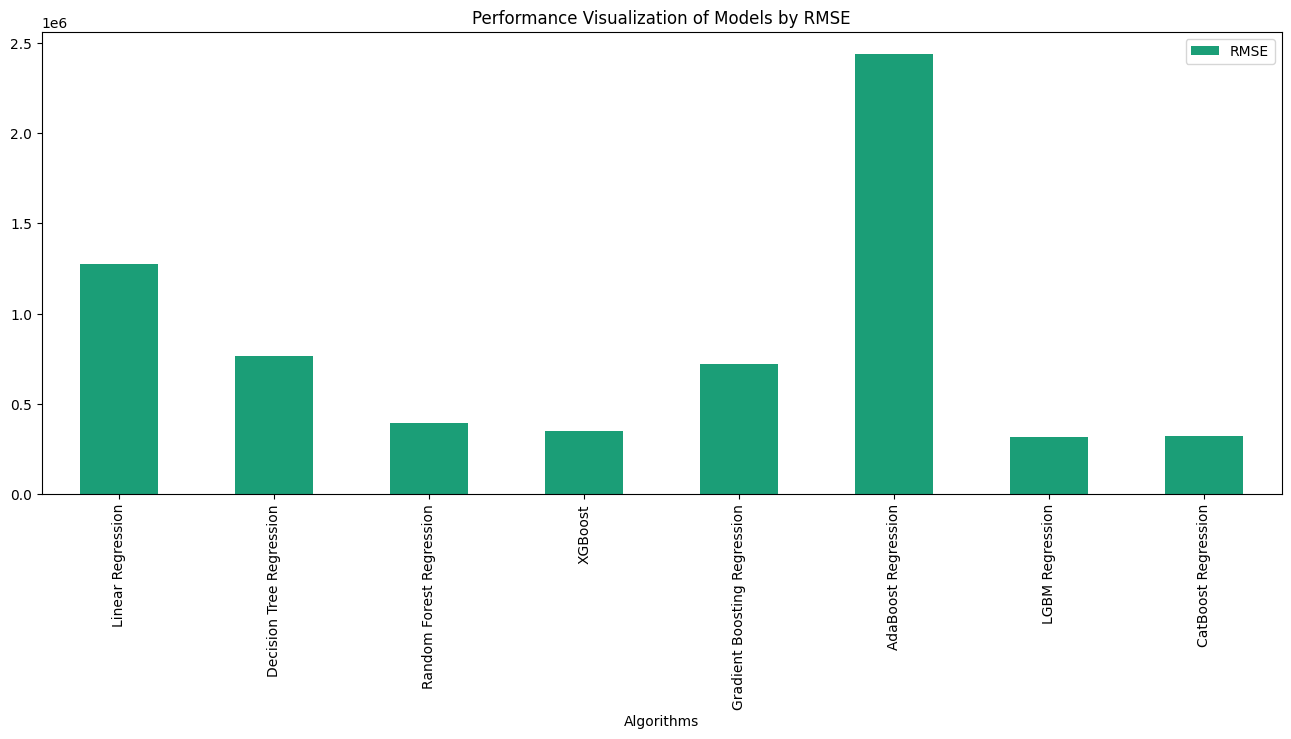

In [110]:
compare_models.plot(x="Algorithms",y=["RMSE"], figsize=(16,6),kind="bar",title="Performance Visualization of Models by RMSE",colormap="Dark2")
plt.show()

# <a id='toc10_'></a>[Conclusion](#toc0_)

After evaluating the RMSE and R2 score values of the regression models, the following conclusions can be drawn:

 - Linear Regression: R2 Score : 92.04%, RMSE : 1.274353e+06
 - Decision Tree Regression: R2 Score : 95.23%, RMSE : 7.635765e+05
 - Random Forest Regression: R2 Score : 97.54%, RMSE : 3.940213e+05
 - XGBoost: R2 Score : 97.83%, RMSE : 3.467581e+05
 - Gradient Boosting Regression: R2 Score : 95.49%, RMSE : 7.222692e+05
 - AdaBoost Regression: R2 Score : 84.75%, RMSE : 2.440771e+06
 - LGBM Regression: R2 Score : 98.02%, RMSE : 3.173658e+05
 - CatBoost Regression: R2 Score : 97.99%, RMSE : 3.201660e+05

The LGBM Regression model stands out as the top performer, with the lowest RMSE value of 3.173658e+05 and a high R2 score of 98.02%. This indicates that the LGBM Regression model provides accurate predictions and a good fit to the data.

The XGBoost and CatBoost Regression models also exhibit strong performance, with both models achieving high R2 scores (97.83% and 97.99%, respectively) and relatively low RMSE values (3.467581e+05 and 3.201660e+05, respectively).

The Random Forest Regression model demonstrates a relatively high R2 score of 97.54%, but its RMSE value (3.940213e+05) is slightly higher compared to the top-performing models.

The Decision Tree Regression and Gradient Boosting Regression models exhibit lower R2 scores (95.23% and 95.49%, respectively) and higher RMSE values (7.635765e+05 and 7.222692e+05, respectively) compared to the top models.

The AdaBoost Regression model has the lowest R2 score (84.75%) and the highest RMSE value (2.440771e+06), indicating relatively poorer performance compared to the other models.

<b>In conclusion</b>, after comparing the R2 scores and RMSE values of various regression models, the LGBM Regression model consistently emerges as a strong performer. With an impressive R2 score of 98.02% and a relatively low RMSE value of 3.173658e+05, the LGBM Regression model demonstrates both a good fit to the data and accurate predictions.

The XGBoost and CatBoost Regression models also exhibit high R2 scores and relatively low RMSE values, positioning them as viable alternatives for consideration.

Although the Random Forest Regression model showcases a high R2 score of 97.54%, its slightly higher RMSE value of 3.940213e+05 suggests that it may not perform as well as the LGBM Regression, XGBoost, or CatBoost models in terms of prediction accuracy.